In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yahooFinance
from datetime import datetime
from functools import reduce
import scipy.optimize as scop

In [2]:
Securities_Tickers = np.array(['META', 'GOOGL','LRCX', 'AMZN','CL=F','SBUX'])
YahooFinanceData = np.array([yahooFinance.Ticker(i) for i in Securities_Tickers], dtype=object)
Historical_Price = np.array([pd.DataFrame(i.history(period='5y')) for i in YahooFinanceData], dtype=object)

In [3]:
Dates = np.array([(list(set(Historical_Price[i].index) & set(Historical_Price[i+1].index)) if i != (len(Historical_Price)-1) else set(Historical_Price[i].index)) for i in range(len(Historical_Price))], dtype=object)
Date = np.array([Dates[0][i].to_pydatetime() for i in range(len(Dates[0]))], dtype=object)

In [4]:
Historical_Price_A = np.array(np.arange(len(Historical_Price)), dtype=object)
for i in range(len(Historical_Price)):
    Historical_Price_A[i] = Historical_Price[i].loc[Historical_Price[i].index.isin(Date)]

In [ ]:
for i in range(len(Historical_Price_A)):
    Historical_Price_A[i]['returns'] = np.arange(len(Historical_Price_A[i].index))
    for j in range(1,len(Historical_Price_A[i].index)):
         Historical_Price_A[i]['returns'].iloc[j] = (Historical_Price_A[i]['Close'].iloc[j] -  Historical_Price_A[i]['Close'].iloc[j-1])/ Historical_Price_A[i]['Close'].iloc[j-1]
    Historical_Price_A[i]['returns'].iloc[-1] = Historical_Price_A[i]['returns'].mean()

In [6]:
Securities = np.array(['META','GOOGLE','LAM RESEARCH', 'AMAZON','CRUDE OIL','STARBUCKS'])
Cov_Matrix = pd.DataFrame({'META': np.arange(len(Securities)), 'GOOGLE': np.arange(len(Securities)),'LAM RESEARCH': np.arange(len(Securities)), 'AMAZON': np.arange(len(Securities)),'CRUDE OIL': np.arange(len(Securities)),'STARBUCKS': np.arange(len(Securities))}, columns=Securities)
Cov_Matrix.index = Securities
Returns = np.array([Historical_Price_A[i]['returns'].mean() for i in range(len(Historical_Price_A))])
Std_Dev = np.array([Historical_Price_A[i]['returns'].std() for i in range(len(Historical_Price_A))])

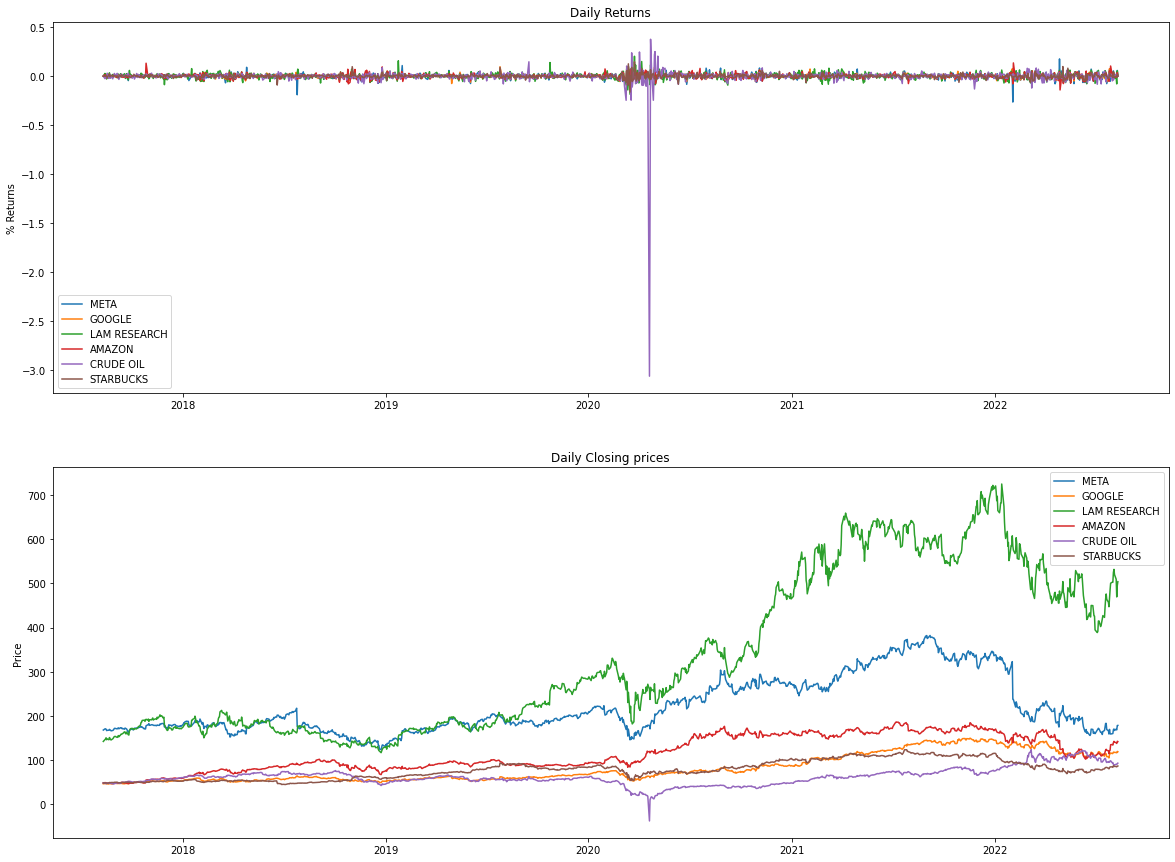

In [7]:
Plot_objects = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
fig, (ax1,ax2) = Plot_objects

ax1.plot(Historical_Price_A[0].index, Historical_Price_A[0]['returns'],'-', label="META")
ax1.plot(Historical_Price_A[0].index, Historical_Price_A[1]['returns'],'-', label="GOOGLE")
ax1.plot(Historical_Price_A[0].index, Historical_Price_A[2]['returns'],'-', label="LAM RESEARCH")
ax1.plot(Historical_Price_A[0].index, Historical_Price_A[3]['returns'],'-', label="AMAZON")
ax1.plot(Historical_Price_A[0].index, Historical_Price_A[4]['returns'],'-', label="CRUDE OIL")
ax1.plot(Historical_Price_A[0].index, Historical_Price_A[5]['returns'],'-', label="STARBUCKS")

ax1.set_ylabel("% Returns")
ax1.set_title("Daily Returns")
ax1.legend()

ax2.plot(Historical_Price_A[0].index, Historical_Price_A[0]['Close'],'-', label="META")
ax2.plot(Historical_Price_A[0].index, Historical_Price_A[1]['Close'],'-', label="GOOGLE")
ax2.plot(Historical_Price_A[0].index, Historical_Price_A[2]['Close'],'-', label="LAM RESEARCH")
ax2.plot(Historical_Price_A[0].index, Historical_Price_A[3]['Close'],'-', label="AMAZON")
ax2.plot(Historical_Price_A[0].index, Historical_Price_A[4]['Close'],'-', label="CRUDE OIL")
ax2.plot(Historical_Price_A[0].index, Historical_Price_A[5]['Close'],'-', label="STARBUCKS")

ax2.set_ylabel("Price")
ax2.set_title("Daily Closing prices")
ax2.legend()
#ax1.plot(googl.index, googl['returns'],'-', label="GOOGLE")

In [8]:
Risk_Return = pd.DataFrame({'Returns':Returns,'Beta':Std_Dev},index=Securities)
Risk_Return

,Returns,Beta
META,0.000369,0.025083
GOOGLE,0.000928,0.018754
LAM RESEARCH,0.001426,0.029485
AMAZON,0.001092,0.021558
CRUDE OIL,-0.001900,0.099234
STARBUCKS,0.000639,0.018767


In [ ]:
for i in range(len(Cov_Matrix.index)):
    Cov_Matrix['META'].iloc[i] = np.cov(Historical_Price_A[0]['returns'], Historical_Price_A[i]['returns'])[0][1]
    Cov_Matrix['GOOGLE'].iloc[i] = np.cov(Historical_Price_A[1]['returns'],Historical_Price_A[i]['returns'])[0][1]
    Cov_Matrix['LAM RESEARCH'].iloc[i] = np.cov(Historical_Price_A[2]['returns'],Historical_Price_A[i]['returns'])[0][1]
    Cov_Matrix['AMAZON'].iloc[i] = np.cov(Historical_Price_A[3]['returns'],Historical_Price_A[i]['returns'])[0][1]
    Cov_Matrix['CRUDE OIL'].iloc[i] = np.cov(Historical_Price_A[4]['returns'], Historical_Price_A[i]['returns'])[0][1]
    Cov_Matrix['STARBUCKS'].iloc[i] = np.cov(Historical_Price_A[5]['returns'],Historical_Price_A[i]['returns'])[0][1]
   

In [10]:
Cov_Matrix

,META,GOOGLE,LAM RESEARCH,AMAZON,CRUDE OIL,STARBUCKS
META,0.000629,0.000321,0.000374,0.000334,0.000189,0.000218
GOOGLE,0.000321,0.000352,0.000335,0.000271,0.000198,0.000195
LAM RESEARCH,0.000374,0.000335,0.000869,0.000308,0.000359,0.000287
AMAZON,0.000334,0.000271,0.000308,0.000465,0.000103,0.000172
CRUDE OIL,0.000189,0.000198,0.000359,0.000103,0.009847,0.000195
STARBUCKS,0.000218,0.000195,0.000287,0.000172,0.000195,0.000352


In [11]:
Corr_Matrix = Cov_Matrix.corr()
Corr_Matrix

,META,GOOGLE,LAM RESEARCH,AMAZON,CRUDE OIL,STARBUCKS
META,1.000000,0.647992,0.171083,0.558438,-0.483724,-0.189162
GOOGLE,0.647992,1.000000,0.446563,0.572312,-0.564741,-0.287257
LAM RESEARCH,0.171083,0.446563,1.000000,0.109704,-0.120816,0.279945
AMAZON,0.558438,0.572312,0.109704,1.000000,-0.670000,-0.373241
CRUDE OIL,-0.483724,-0.564741,-0.120816,-0.670000,1.000000,-0.281617
STARBUCKS,-0.189162,-0.287257,0.279945,-0.373241,-0.281617,1.000000


In [12]:
def portfolio_performance(weights, mean_returns, Cov_Matrix):
    Port_returns = np.sum(mean_returns*weights ) *252
    Port_Std = np.sqrt(np.dot(weights.T, np.dot(Cov_Matrix, weights))) * np.sqrt(252)
    
    return Port_Std, Port_returns

    
def port_simulation(num_portfolio, mean_returns, cov_matrix, risk_free_rate):
    
    Port_returns = np.zeros((num_portfolio))
    Port_weights =  np.zeros((num_portfolio, len(mean_returns)))
    Port_Std = np.zeros((num_portfolio))
    Port_sharpe_ratio = np.zeros((num_portfolio))

    for i in range(num_portfolio):
        weights = np.random.uniform(size = len(mean_returns))
        weights = weights/np.sum(weights)
        Port_weights[i,:] = weights
        
        Portfolio_Std, Portfolio_returns = portfolio_performance(weights, mean_returns, cov_matrix)
        
        Port_Std[i] = Portfolio_Std
        Port_returns[i] = Portfolio_returns
        Port_sharpe_ratio[i] = (Portfolio_returns - risk_free_rate) / Portfolio_Std

    return Port_returns, Port_weights, Port_Std, Port_sharpe_ratio


def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[0]

def efficient_return(mean_returns, cov_matrix, target):
    
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    
    result = scop.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients 

In [13]:
Port_returns, Port_weights, Port_Std, Port_sharpe_ratio = port_simulation(30000, Returns, Cov_Matrix, 0.03)

In [14]:
Max_Sharpe_Ratio_Idx = np.argmax(Port_sharpe_ratio)
SR_Std, SR_return = Port_Std[Max_Sharpe_Ratio_Idx], Port_returns[Max_Sharpe_Ratio_Idx]
Max_Sharpe_Ratio_Allocation = pd.DataFrame(Port_weights[Max_Sharpe_Ratio_Idx],index= Securities,columns=['Weights'])
Max_Sharpe_Ratio_Allocation.Weights = [round(i*100,2)for i in Max_Sharpe_Ratio_Allocation.Weights]
Max_Sharpe_Ratio_Allocation = Max_Sharpe_Ratio_Allocation.T

Min_Risk_Idx = np.argmin(Port_Std)
MinR_std, MinR_return = Port_Std[Min_Risk_Idx], Port_returns[Min_Risk_Idx]
Min_Risk_allocation = pd.DataFrame(Port_weights[Min_Risk_Idx],index= Securities,columns=['Weights'])
Min_Risk_allocation.Weights = [round(i*100,2)for i in Min_Risk_allocation.Weights]
Min_Risk_allocation = Min_Risk_allocation.T

target = np.linspace(MinR_return, 0.4, 50)
efficient_portfolios = efficient_frontier(Returns, Cov_Matrix, target)

--------------------------------------------------------------------------------
Allocation for Max Sharpe Ratio

Annual Return: 0.3
Annual Volatility: 0.34


         META  GOOGLE  LAM RESEARCH  AMAZON  CRUDE OIL  STARBUCKS
Weights  0.05    0.01         47.57   45.75        0.4       6.22
--------------------------------------------------------------------------------
Allocation for minimal volatility

Annual Return: 0.19
Annual Volatility: 0.26


         META  GOOGLE  LAM RESEARCH  AMAZON  CRUDE OIL  STARBUCKS
Weights  2.59   34.09          0.47    13.3       1.69      47.86


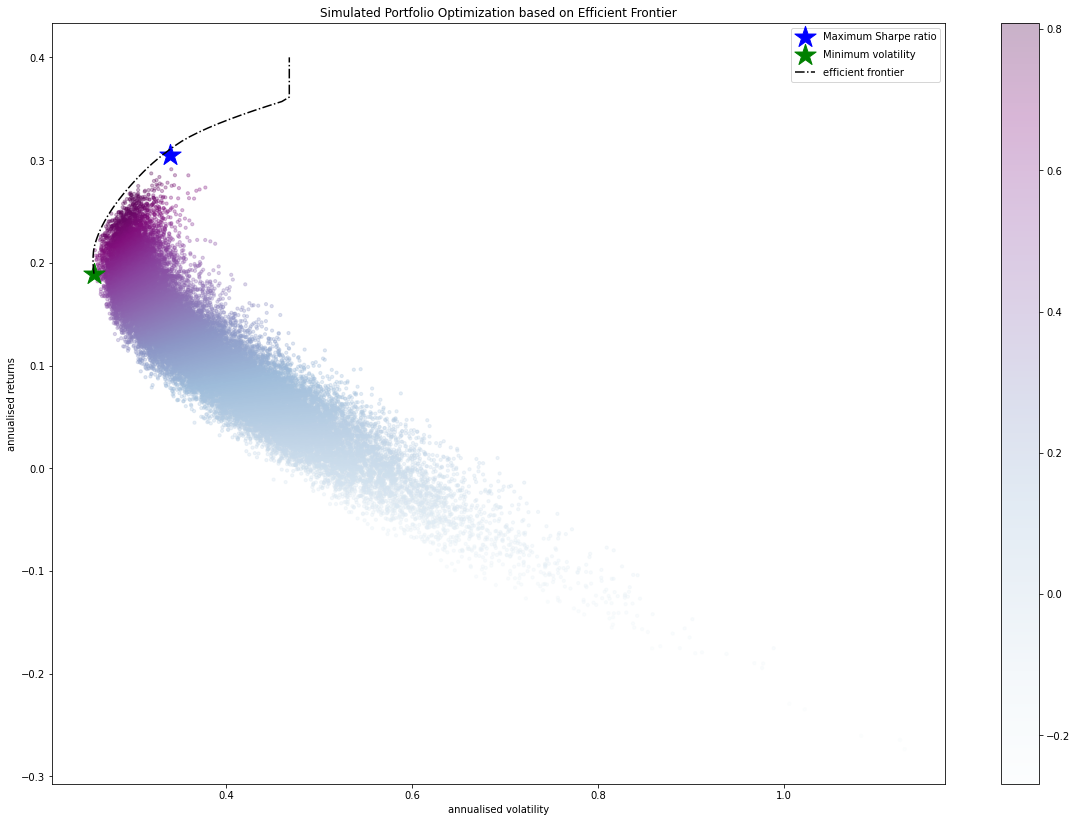

In [15]:
print ("-"*80)
print ("Allocation for Max Sharpe Ratio\n")
print ("Annual Return:", round(SR_return,2))
print ("Annual Volatility:", round(SR_Std,2))
print ("\n")
print (Max_Sharpe_Ratio_Allocation)
print ("-"*80)
print ("Allocation for minimal volatility\n")
print ("Annual Return:", round(MinR_return,2))
print ("Annual Volatility:", round(MinR_std,2))
print ("\n")
print (Min_Risk_allocation)

plt.figure(figsize=(20, 14))
plt.scatter(Port_Std,Port_returns,c= Port_sharpe_ratio,cmap ='BuPu', marker='o', s=10, alpha=0.3)
plt.colorbar()
plt.scatter(SR_Std,SR_return,marker='*',color='b',s=500, label='Maximum Sharpe ratio')
plt.scatter(MinR_std,MinR_return,marker='*',color='g',s=500, label='Minimum volatility')
plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')


plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')
plt.legend(labelspacing=0.8)